<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/vishal_umare/Vishal_EplScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path ='/content/drive/MyDrive/Internship/dataset_epl.csv'

In [4]:
import pandas as pd
df=pd.read_csv(file_path)
print(df)

                     Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward   

    Nationality   Age  Appe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [ ]:
df.shape

(571, 59)

In [ ]:
df.head(10)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
5,William Saliba,4.0,Arsenal,Defender,France,19.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
8,Shkodran Mustafi,20.0,Arsenal,Defender,Germany,28.0,99,52,26,7,...,NaN,NaN,NaN,NaN,NaN,NaN,28,0,117,7.0
9,Calum Chambers,21.0,Arsenal,Defender,England,25.0,139,47,57,6,...,NaN,NaN,NaN,NaN,NaN,NaN,28,1,137,2.0


In [ ]:
df.tail(3)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


**Task 1. Identify which column are useful for predicting player performance**

In [ ]:
useful_columns = [
    'Appearances', 'Goals', 'Assists', 'Shots', 'Passes',
    'Tackles', 'Interceptions', 'Dribbles', 'Crosses',
    'Minutes'
]

[c for c in useful_columns if c in df.columns]

['Appearances',
 'Goals',
 'Assists',
 'Shots',
 'Passes',
 'Tackles',
 'Interceptions',
 'Crosses']

**Task 2.Make a short note of irrelevant column**

In [ ]:
irrelevant_columns = ['Name', 'Club', 'Jersey Number', 'Nationality']
[c for c in irrelevant_columns if c in df.columns]

# Certain columns in the dataset - such as Name, Jersey Number, and Nationality - do not have any direct influence on a player's on-field performance
# These attributes do not contribute meaningful statistical information for predicting player potential or performance metrics.
# Hence, they are considered irrelevant features and can be removed from the dataset to improve model efficiency and reduce noise during analysis.

['Name', 'Club', 'Jersey Number', 'Nationality']

**Task 3.Handle missing values(Find empty or 0 values in imp column and replace with mean.)**

In [ ]:
import pandas as pd
import numpy as np

# Important performance columns
important_cols = ['Goals', 'Assists', 'Appearances', 'Shots', 'Shooting accuracy %']

# Ensure accuracy column exists before processing
if "Shooting accuracy %" in df.columns:
    df["Shooting accuracy %"] = (
        df["Shooting accuracy %"].astype(str).str.replace('%', '', regex=True)
    )

# Replace 0 with NaN only in these important columns
df[important_cols] = df[important_cols].replace(0, np.nan)

# Convert all important columns to numeric
df[important_cols] = df[important_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values with mean
df[important_cols] = df[important_cols].fillna(df[important_cols].mean())

# Check missing values after final cleaning
print("Missing Values After Cleaning:")
print(df[important_cols].isna().sum())

print("\nCleaned Important Columns (first 5 rows):")
print(df[important_cols].head())

Missing Values After Cleaning:
Goals                  0
Assists                0
Appearances            0
Shots                  0
Shooting accuracy %    0
dtype: int64

Cleaned Important Columns (first 5 rows):
       Goals    Assists  Appearances       Shots  Shooting accuracy %
0  13.198738   9.090361    64.000000  119.524528            28.679612
1  13.198738   9.090361    81.700624  119.524528            28.679612
2  13.198738   9.090361    81.700624  119.524528            28.679612
3   7.000000  18.000000   160.000000  119.524528            28.679612
4   1.000000   1.000000    16.000000  119.524528            28.679612


**4. Feature Selection**

In [ ]:
df[important_cols]

,Goals,Assists,Appearances,Shots,Shooting accuracy %
0,13.198738,9.090361,64.000000,119.524528,28.679612
1,13.198738,9.090361,81.700624,119.524528,28.679612
2,13.198738,9.090361,81.700624,119.524528,28.679612
3,7.000000,18.000000,160.000000,119.524528,28.679612
4,1.000000,1.000000,16.000000,119.524528,28.679612
...,...,...,...,...,...
566,3.000000,4.000000,31.000000,19.000000,32.000000
567,32.000000,13.000000,78.000000,237.000000,35.000000
568,5.000000,12.000000,105.000000,78.000000,27.000000
569,13.198738,9.090361,1.000000,119.524528,0.000000


**5. Categorize The Columns**

In [ ]:
# Column grouping
CATEGORICAL_COLS = [
    'Name', 'Jersey Number', 'Club', 'Position', 'Nationality'
]

COUNT_NUMERICAL_COLS = [
    'Age', 'Appearances', 'Wins', 'Losses', 'Goals', 'Headed goals',
    'Goals with right foot', 'Goals with left foot', 'Penalties scored',
    'Freekicks scored', 'Shots', 'Shots on target', 'Hit woodwork',
    'Big chances missed', 'Clean sheets', 'Goals conceded', 'Tackles',
    'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
    'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
    'Duels lost', 'Successful 50/50s', 'Aerial battles won',
    'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
    'Passes', 'Big chances created', 'Crosses', 'Through balls',
    'Accurate long balls', 'Saves', 'Penalties saved', 'Punches',
    'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
    'Goal Kicks', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides'
]
COUNT_NUMERICAL_COLS = [col for col in COUNT_NUMERICAL_COLS if col in df.columns]

RATE_NUMERICAL_COLS = [
    'Goals per match', 'Shooting accuracy %', 'Tackle success %',
    'Cross accuracy %', 'Passes per match'
]

RATE_NUMERICAL_COLS = [col for col in RATE_NUMERICAL_COLS if col in df.columns]


# Convert categorical columns to string
for col in CATEGORICAL_COLS:
    if col in df.columns:
        df[col] = df[col].astype(str)

# Convert percentage columns into numeric
for col in RATE_NUMERICAL_COLS:
    df[col] = (
        df[col].astype(str)
               .str.replace('%', '', regex=True)
               .astype(float)
    )

# Replace zero with NaN and fill missing values using column mean
for col in COUNT_NUMERICAL_COLS + RATE_NUMERICAL_COLS:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(0, np.nan)
        df[col] = df[col].fillna(df[col].mean())

# Check missing values
print("Remaining Missing Values:")
print(df.isna().sum().sort_values(ascending=False).head(10))

Remaining Missing Values:
Name             0
Jersey Number    0
Club             0
Position         0
Nationality      0
Age              0
Appearances      0
Wins             0
Losses           0
Goals            0
dtype: int64


In [ ]:
cleaned_file_path = '/content/drive/MyDrive/dataset_cleaned_epl.csv'
df.to_csv(cleaned_file_path, index=False)
print("Cleaned dataset saved:", cleaned_file_path)


Cleaned dataset saved: /content/drive/MyDrive/dataset_cleaned_epl.csv


**Encode categorical values**

In [ ]:
# Install required packages
!pip install pandas scikit-learn
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Sample dataframe
data = {
    'Club': ['Arsenal', 'Chelsea', 'Liverpool', 'Arsenal'],
    'Position': ['Forward', 'Midfielder', 'Defender', 'Forward'],
    'Home/Away': ['Home', 'Away', 'Home', 'Away']
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# One-Hot Encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=['Club', 'Position', 'Home/Away'])
print("\nOne-Hot Encoded DataFrame:")
print(df_encoded)


Original DataFrame:
        Club    Position Home/Away
0    Arsenal     Forward      Home
1    Chelsea  Midfielder      Away
2  Liverpool    Defender      Home
3    Arsenal     Forward      Away

One-Hot Encoded DataFrame:
   Club_Arsenal  Club_Chelsea  Club_Liverpool  Position_Defender  \
0          True         False           False              False   
1         False          True           False              False   
2         False         False            True               True   
3          True         False           False              False   

   Position_Forward  Position_Midfielder  Home/Away_Away  Home/Away_Home  
0              True                False           False            True  
1             False                 True            True           False  
2             False                False           False            True  
3              True                False            True           False  


## ***HOMEWORK 1 — EXPLORATORY DATA ANALYSIS***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make plots bigger
plt.rcParams['figure.figsize'] = (10, 6)


**Histogram → X: Goals | Y: Frequency**

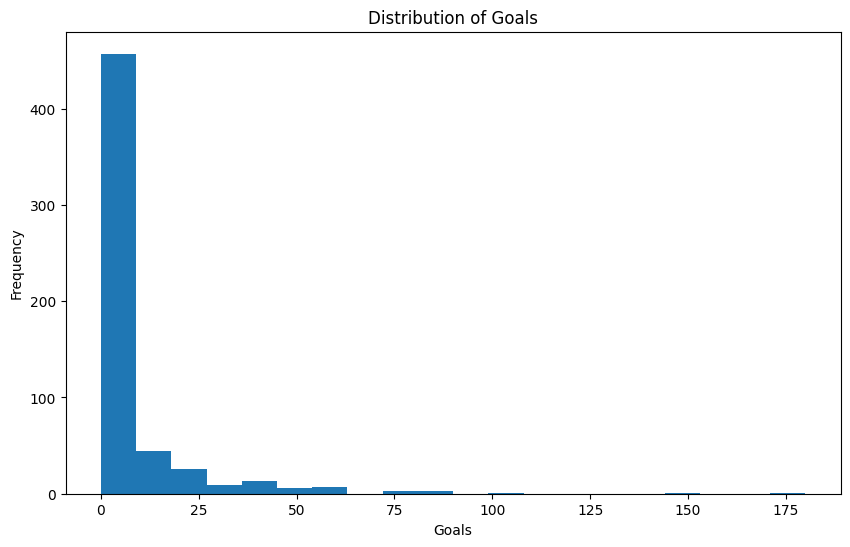

In [ ]:
plt.hist(df['Goals'], bins=20)
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.title("Distribution of Goals")
plt.show()


**2. SCATTER PLOT: Appearances vs Goals**

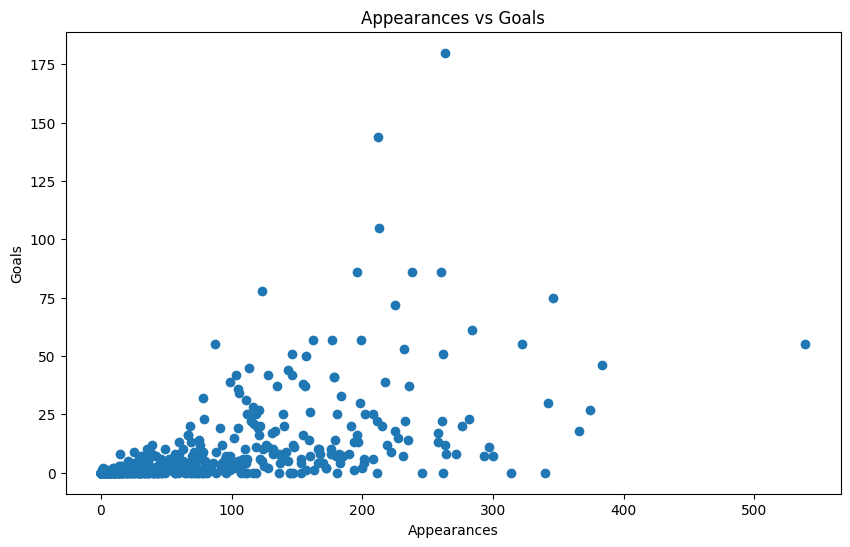

In [ ]:
plt.scatter(df['Appearances'], df['Goals'])
plt.xlabel("Appearances")
plt.ylabel("Goals")
plt.title("Appearances vs Goals")
plt.show()


**3. SCATTER PLOT: Age vs Goals**

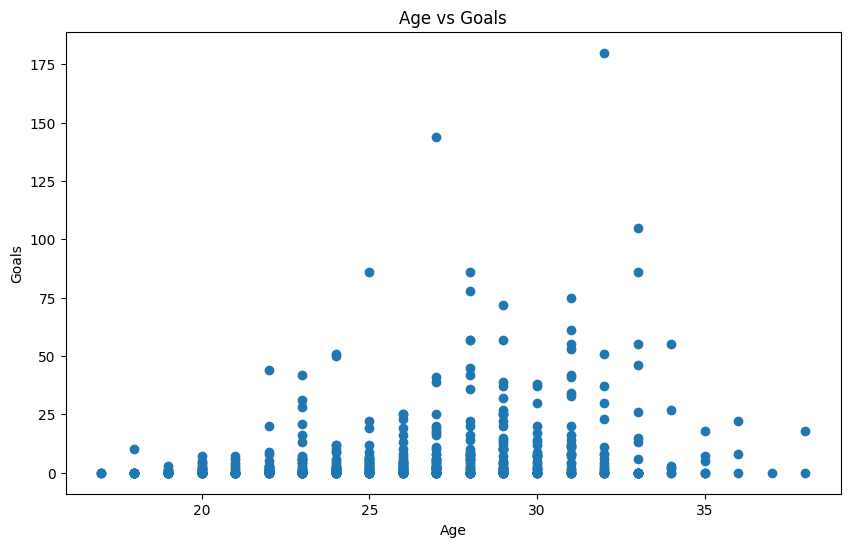

In [ ]:
plt.scatter(df['Age'], df['Goals'])
plt.xlabel("Age")
plt.ylabel("Goals")
plt.title("Age vs Goals")
plt.show()


**4. BAR CHART: Club vs Goals (Sum)**

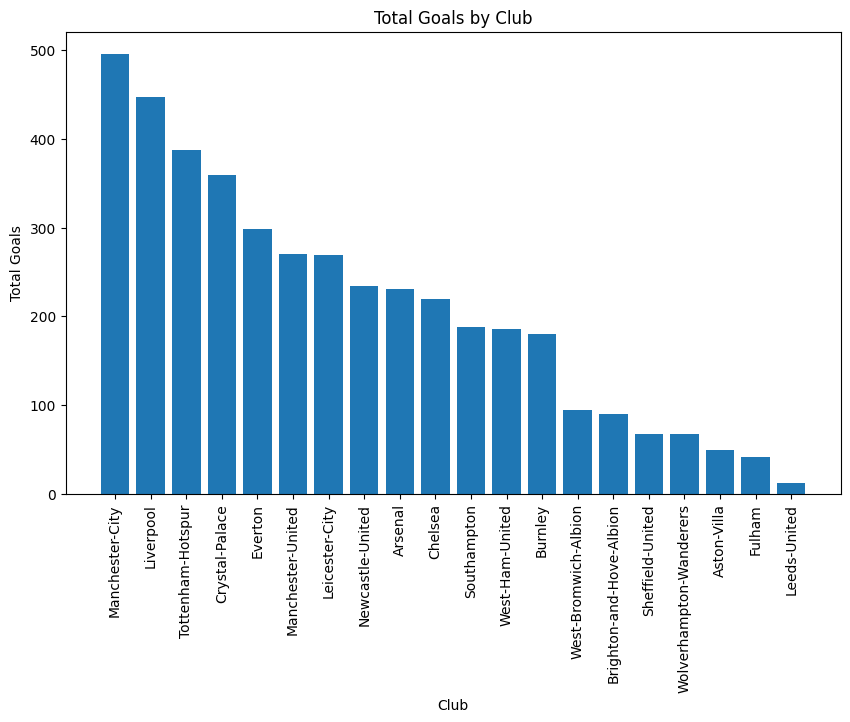

In [ ]:
club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)

plt.bar(club_goals.index, club_goals.values)
plt.xticks(rotation=90)
plt.xlabel("Club")
plt.ylabel("Total Goals")
plt.title("Total Goals by Club")
plt.show()


**5. BAR CHART: Position vs Goals (Average)**

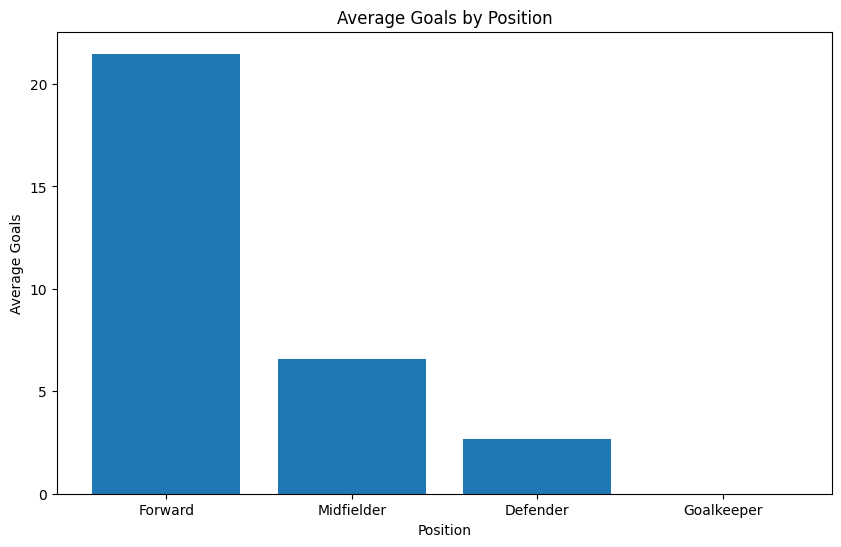

In [ ]:
position_goals = df.groupby('Position')['Goals'].mean().sort_values(ascending=False)

plt.bar(position_goals.index, position_goals.values)
plt.xlabel("Position")
plt.ylabel("Average Goals")
plt.title("Average Goals by Position")
plt.show()


**6. SCATTER PLOT: Shots vs Goals**

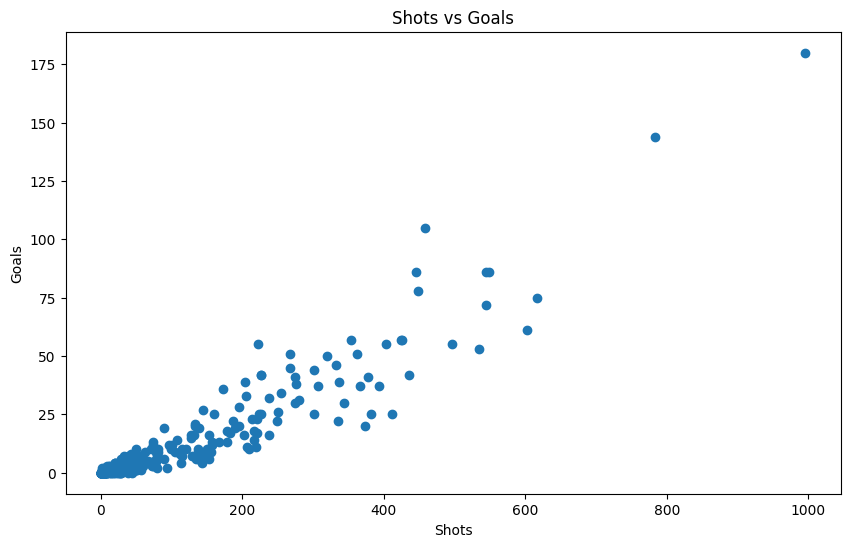

In [ ]:
plt.scatter(df['Shots'], df['Goals'])
plt.xlabel("Shots")
plt.ylabel("Goals")
plt.title("Shots vs Goals")
plt.show()


**7. SCATTER PLOT: Assists vs Goals**

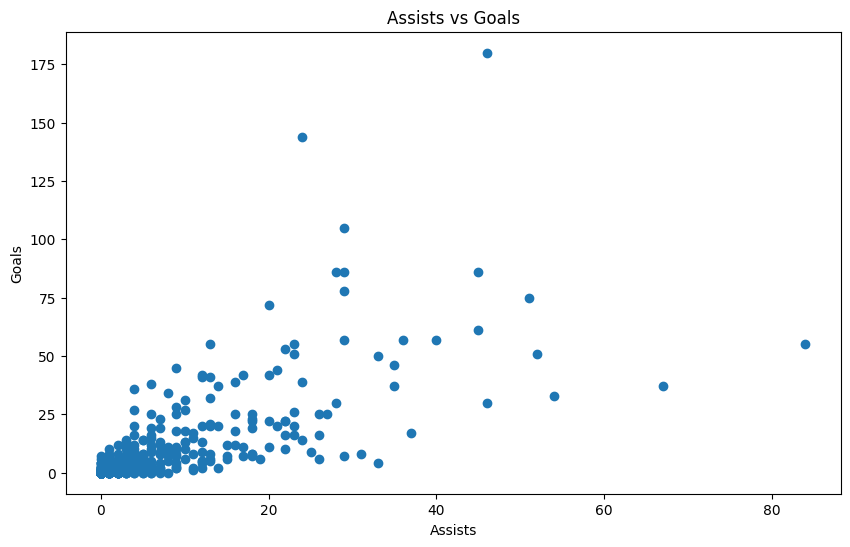

In [ ]:
plt.scatter(df['Assists'], df['Goals'])
plt.xlabel("Assists")
plt.ylabel("Goals")
plt.title("Assists vs Goals")
plt.show()


**8. SCATTER PLOT: Passes vs Assists**

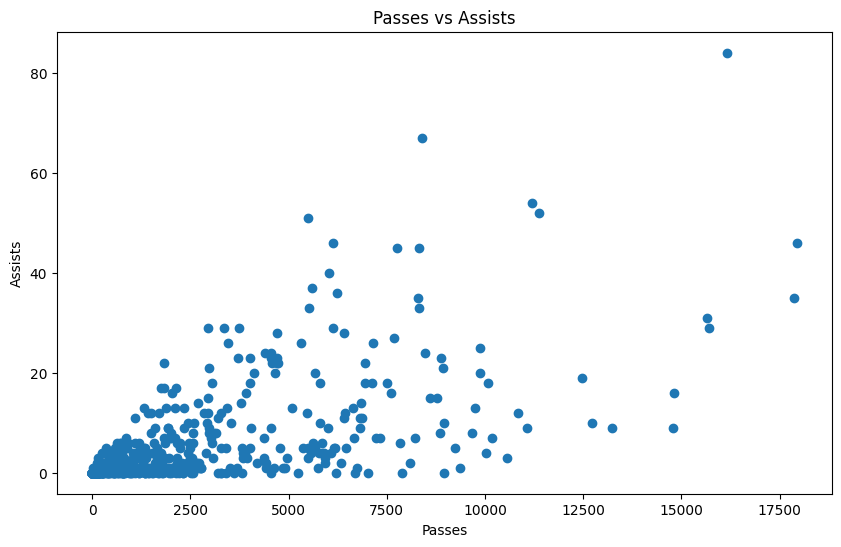

In [ ]:
plt.scatter(df['Passes'], df['Assists'])
plt.xlabel("Passes")
plt.ylabel("Assists")
plt.title("Passes vs Assists")
plt.show()


**9. SCATTER PLOT: Tackles vs Tackle Success %**

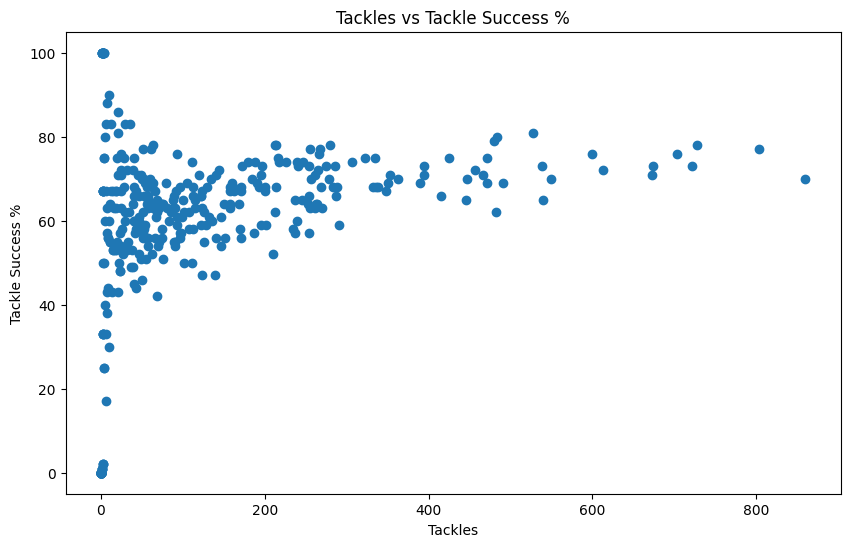

In [ ]:
# Clean the "Tackle success %" column
df['Tackle success %'] = (
    df['Tackle success %']
    .astype(str)          # convert everything to string
    .str.replace('%', '') # remove % symbol
    .str.strip()          # remove extra spaces
    .astype(float)        # convert to float
)

# Scatter plot
plt.scatter(df['Tackles'], df['Tackle success %'])
plt.xlabel("Tackles")
plt.ylabel("Tackle Success %")
plt.title("Tackles vs Tackle Success %")
plt.show()


**10. BAR CHART: Nationality vs Goals (Sum)**

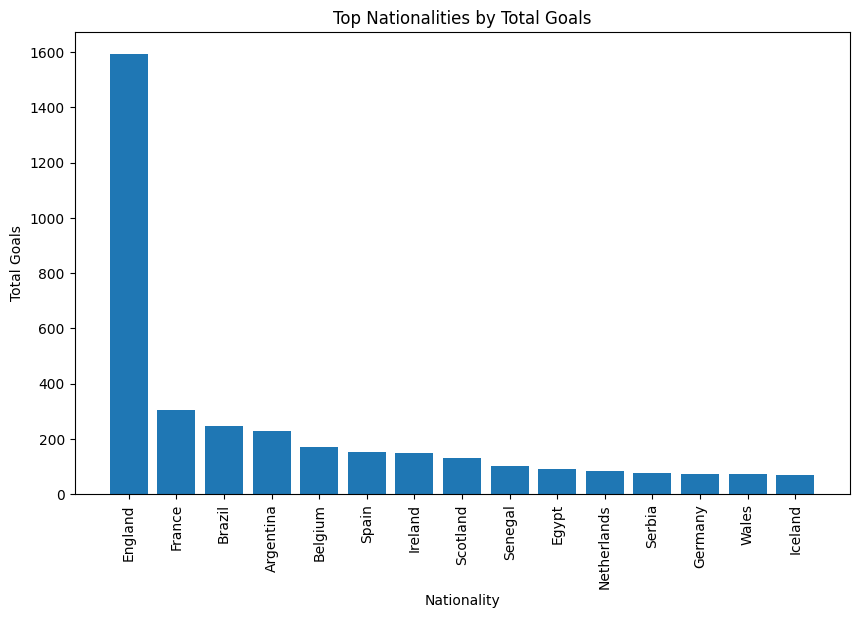

In [ ]:
nat_goals = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False).head(15)

plt.bar(nat_goals.index, nat_goals.values)
plt.xticks(rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Total Goals")
plt.title("Top Nationalities by Total Goals")
plt.show()


## ***HOMEWORK 2 — FEATURE SCALING***

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
print("Raw Values:")
print(df[['Goals', 'Appearances', 'Passes']].head())


Raw Values:
   Goals  Appearances  Passes
0      0           64    1783
1      0            0       0
2      0            0       0
3      7          160    7125
4      1           16     519


In [ ]:
# Applying min-max scaling

minmax_cols = ['Goals', 'Appearances', 'Passes', 'Assists']
minmax_scaler = MinMaxScaler()

df_minmax = df.copy()
df_minmax[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])

print("Min-Max Scaled Values:")
print(df_minmax[minmax_cols].head())

Min-Max Scaled Values:
      Goals  Appearances    Passes   Assists
0  0.000000     0.118738  0.099431  0.000000
1  0.000000     0.000000  0.000000  0.000000
2  0.000000     0.000000  0.000000  0.000000
3  0.038889     0.296846  0.397334  0.214286
4  0.005556     0.029685  0.028943  0.011905


In [ ]:
# Apply standardization (z-score)

standard_cols = ['Goals', 'Shots', 'Passes']
standard_scaler = StandardScaler()

df_standard = df.copy()
df_standard[standard_cols] = standard_scaler.fit_transform(df[standard_cols])

print("Standardized Values:")
print(df_standard[standard_cols].head())

Standardized Values:
      Goals  Shots    Passes
0 -0.436270    NaN -0.168573
1 -0.436270    NaN -0.739227
2 -0.436270    NaN -0.739227
3 -0.019499    NaN  1.541148
4 -0.376732    NaN -0.573119


## **Comparing scatter plots before vs. after feature scaling**

**Goals vs Appearances (Before Scaling)**

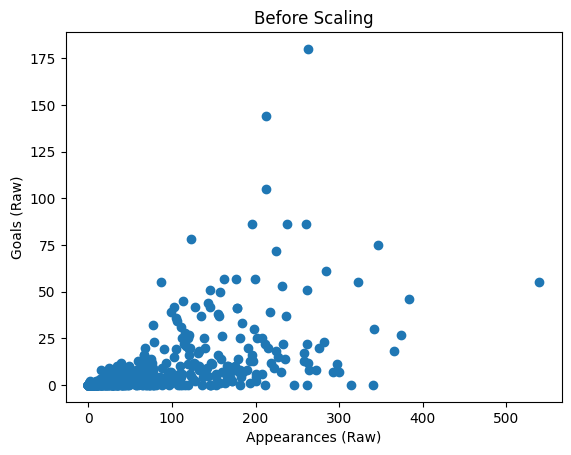

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Appearances'], df['Goals'])
plt.xlabel("Appearances (Raw)")
plt.ylabel("Goals (Raw)")
plt.title("Before Scaling")
plt.show()


**Goals vs Appearances (After Min-Max Scaling)**

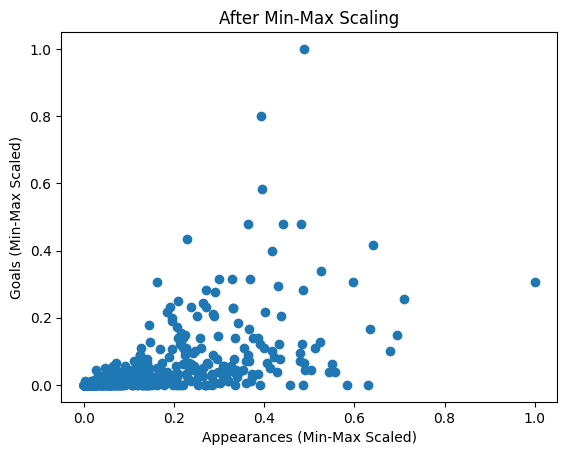

In [ ]:
plt.scatter(df_minmax['Appearances'], df_minmax['Goals'])
plt.xlabel("Appearances (Min-Max Scaled)")
plt.ylabel("Goals (Min-Max Scaled)")
plt.title("After Min-Max Scaling")
plt.show()


**Goals vs Passes (Before Scaling)**

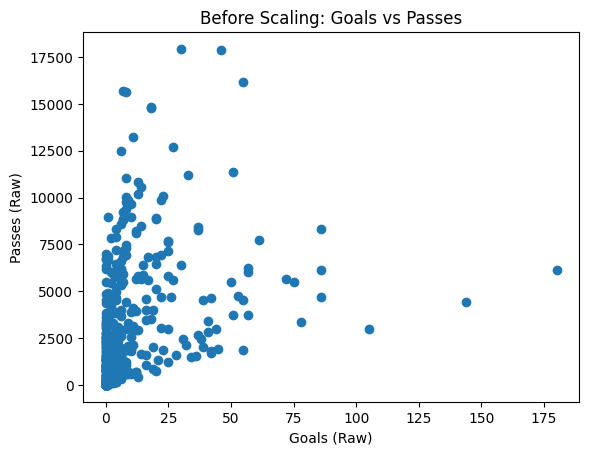

In [ ]:
plt.scatter(df['Goals'], df['Passes'])
plt.xlabel("Goals (Raw)")
plt.ylabel("Passes (Raw)")
plt.title("Before Scaling: Goals vs Passes")
plt.show()


**Goals vs Passes (After Standardization)**

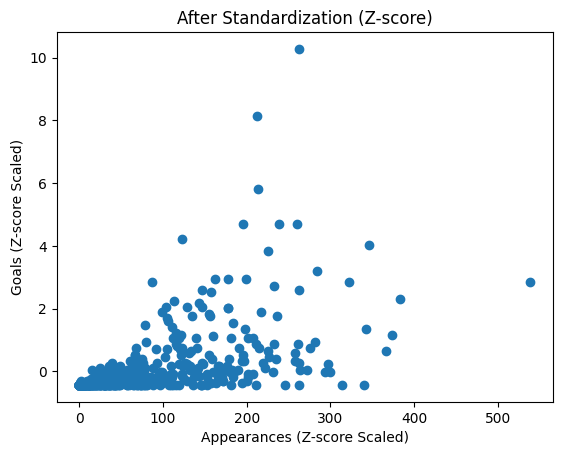

In [ ]:
plt.scatter(df_standard['Appearances'], df_standard['Goals'])
plt.xlabel("Appearances (Z-score Scaled)")
plt.ylabel("Goals (Z-score Scaled)")
plt.title("After Standardization (Z-score)")
plt.show()

### ***HOMEWORK 3***

### **1) Train–Test Split**

In [7]:
from sklearn.model_selection import train_test_split

# Feature selection
feature_cols = [
    'Appearances', 'Shots', 'Passes', 'Assists', 'Minutes'
]

feature_cols = [col for col in feature_cols if col in df.columns]

# Select features and target
X = df[feature_cols]
y = df['Goals']

#  Handle NaN values after feature selection
X = X.fillna(X.mean())
y = y.fillna(y.mean())


# 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape :", X_test.shape)


Training set shape: (428, 4)
Testing set shape : (143, 4)


### **2) Baseline Regression Model — Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)


In [9]:
#Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


Linear Regression Performance
MSE : 45.60199660266461
RMSE: 6.752925040503901
R²  : 0.6498947153820464


### **2) Baseline Classification Model — Logistic Regression**

In [10]:
# Create simple outcome column
df['Match_Outcome'] = df['Goals'].apply(
    lambda x: 'Win' if x > 0 else 'Loss'
)


In [11]:
#Encode Target Variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Outcome_encoded'] = le.fit_transform(df['Match_Outcome'])


In [14]:
#Prepare Data for Classification
# Select features and target for classification
X_cls = df[feature_cols]
y_cls = df['Outcome_encoded']

# : Handle NaN values AFTER feature selection
X_cls = X_cls.fillna(X_cls.mean())
y_cls = y_cls.fillna(y_cls.mode()[0])


# 75% training, 25% testing
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls,
    test_size=0.25,
    random_state=42
)


In [15]:
#Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)


LogisticRegression(max_iter=1000)

In [16]:
#Evaluate Classification Model
from sklearn.metrics import accuracy_score, classification_report

y_pred_c = log_model.predict(X_test_c)

print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c))


Logistic Regression Accuracy: 0.8531468531468531

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        74
           1       0.88      0.81      0.84        69

    accuracy                           0.85       143
   macro avg       0.86      0.85      0.85       143
weighted avg       0.85      0.85      0.85       143



## **3) MODEL EVALUATION**

A) Regression Model Evaluation (Linear Regression)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Regression Model Evaluation (Linear Regression)")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Regression Model Evaluation (Linear Regression)
MAE : 5.738559159975695
RMSE: 6.752925040503901
R²  : 0.6498947153820464


B) Classification Model Evaluation (Logistic Regression)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Classification evaluation metrics
accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)

print("Classification Model Evaluation (Logistic Regression)")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

print("\nDetailed Classification Report:")
print(classification_report(y_test_c, y_pred_c))


Classification Model Evaluation (Logistic Regression)
Accuracy : 0.8531468531468531
Precision: 0.875
Recall   : 0.8115942028985508
F1-score : 0.8421052631578947

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        74
           1       0.88      0.81      0.84        69

    accuracy                           0.85       143
   macro avg       0.86      0.85      0.85       143
weighted avg       0.85      0.85      0.85       143



## **4) VISUALIZATION**

**A) Loss Curves (Train vs Test Error) — Regression**

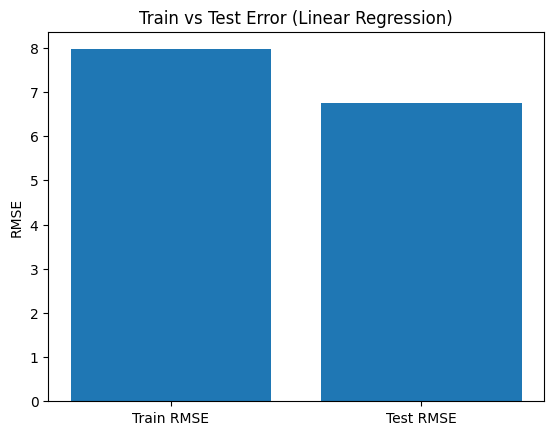

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Predictions on training data
y_train_pred = lr_model.predict(X_train)

# RMSE for train and test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot
plt.bar(['Train RMSE', 'Test RMSE'], [train_rmse, test_rmse])
plt.ylabel("RMSE")
plt.title("Train vs Test Error (Linear Regression)")
plt.show()


**B) Actual vs Predicted Scatter Plot**

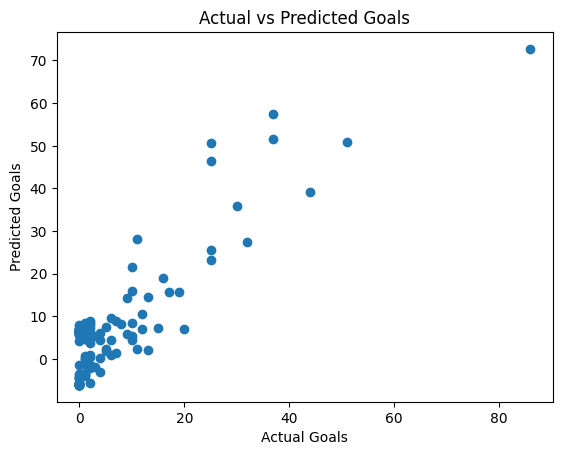

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.show()


**C) Confusion Matrix — Match Outcome Classification**

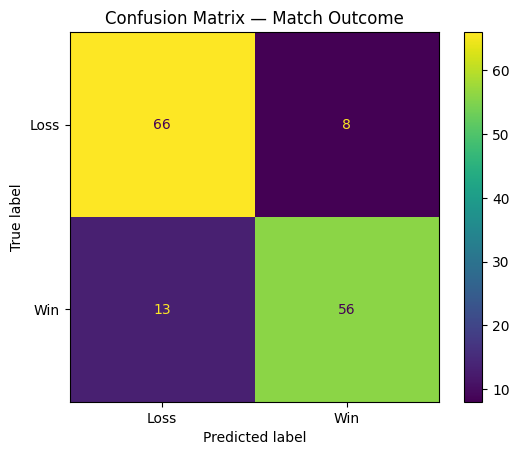

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_c, y_pred_c)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Loss', 'Win']
)

disp.plot()
plt.title("Confusion Matrix — Match Outcome")
plt.show()


## **5) ADVANCED MODELS**

**A) Regression Model — Random Forest Regressor**

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize model
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train model
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)


Random Forest Regression Performance
MAE : 2.1506993006993014
RMSE: 4.09601879024864
R²  : 0.8711932302945566


**B) Classification model-XGBoost.**

In [23]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [24]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train model
xgb_model.fit(X_train_c, y_train_c)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:55:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [26]:
#Predictions
y_pred_xgb = xgb_model.predict(X_test_c)

In [27]:
#Model Evaluation
accuracy_xgb = accuracy_score(y_test_c, y_pred_xgb)

print("XGBoost Classification Performance")
print("Accuracy:", accuracy_xgb)
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_xgb))


XGBoost Classification Performance
Accuracy: 0.8671328671328671

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        74
           1       0.82      0.93      0.87        69

    accuracy                           0.87       143
   macro avg       0.87      0.87      0.87       143
weighted avg       0.87      0.87      0.87       143



## **6) HYPERPARAMETER TUNING**

**A) Random Forest Regressor (GridSearchCV)**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Grid Search
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Train
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_

print("Best Random Forest Parameters:")
print(rf_grid.best_params_)


Best Random Forest Parameters:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [29]:
#Evaluate Tuned Random Forest
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_rf_tuned = best_rf.predict(X_test)

rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Performance")
print("RMSE:", rmse_rf_tuned)
print("R²  :", r2_rf_tuned)


Tuned Random Forest Performance
RMSE: 4.076585646396756
R²  : 0.8724125521349081


**B) XGBoost Classifier (RandomizedSearchCV)**

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Parameter distribution
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize model
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Randomized Search
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Train
xgb_random.fit(X_train_c, y_train_c)

# Best model
best_xgb = xgb_random.best_estimator_

print("Best XGBoost Parameters:")
print(xgb_random.best_params_)


Best XGBoost Parameters:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:59:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
#Evaluate Tuned XGBoost
from sklearn.metrics import accuracy_score, classification_report

y_pred_xgb_tuned = best_xgb.predict(X_test_c)

print("Tuned XGBoost Performance")
print("Accuracy:", accuracy_score(y_test_c, y_pred_xgb_tuned))
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_xgb_tuned))


Tuned XGBoost Performance
Accuracy: 0.8461538461538461

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        74
           1       0.80      0.91      0.85        69

    accuracy                           0.85       143
   macro avg       0.85      0.85      0.85       143
weighted avg       0.85      0.85      0.85       143



## **7 — PERFORMANCE COMPARISON**

**A) Regression Models Comparison (Linear Regression and Random Forest (Tuned))**

In [33]:
import pandas as pd

regression_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest (Tuned)'],
    'MAE': [mae, mae_rf],
    'RMSE': [rmse, rmse_rf_tuned],
    'R²': [r2, r2_rf_tuned]
})

print("Regression Model Comparison")
regression_comparison


Regression Model Comparison


,Model,MAE,RMSE,R²
0,Linear Regression,5.738559,6.752925,0.649895
1,Random Forest (Tuned),2.150699,4.076586,0.872413


from matplotlib import pyplot as plt
regression_comparison['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
regression_comparison['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
regression_comparison['R²'].plot(kind='hist', bins=20, title='R²')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
regression_comparison.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
regression_comparison.plot(kind='scatter', x='MAE', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
regression_comparison.plot(kind='scatter', x='RMSE', y='R²', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R²']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = regression_comparison.sort_values('R²', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R²')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R²']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = regression_comparison.sort_values('R²', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R²')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['R²']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'R²'}, axis=1)
              .sort_values('R²', ascending=True))
  xs = counted['R²']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = regression_comparison.sort_values('R²', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R²')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
regression_comparison['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
regression_comparison['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
regression_comparison['R²'].plot(kind='line', figsize=(8, 4), title='R²')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(regression_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(regression_comparison, x='MAE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(regression_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(regression_comparison, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(regression_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(regression_comparison, x='R²', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**B) Classification Models Comparison (Logistic Regression and XGBoost (Tuned) )**

In [35]:
classification_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost (Tuned)'],
    'Accuracy': [accuracy, accuracy_xgb]
})

print("Classification Model Comparison")
classification_comparison


Classification Model Comparison


,Model,Accuracy
0,Logistic Regression,0.853147
1,XGBoost (Tuned),0.867133


from matplotlib import pyplot as plt
classification_comparison['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
classification_comparison.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Accuracy'}, axis=1)
              .sort_values('Accuracy', ascending=True))
  xs = counted['Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = classification_comparison.sort_values('Accuracy', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
classification_comparison['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(classification_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(classification_comparison, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)